# Análisis Exploratorio:  
# ¿Qué Caracteristicas hacen triunfar a un juego?

**Objetivo:** Explorar el dataset limpio y extraer conclusiones estadísticas básicas.

## ¿Qué géneros de videojuegos han sido más populares cada año?

In [46]:
#Importación de las librerias necesarias para el proyecto.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Estilo visual para los gráficos
sns.set_style("whitegrid")
sns.set_palette("deep")

In [ ]:
# Cargamos los datos de juegos por genero
df = pd.read_json('../data/processed/popularidad_generos.json')

- Vamos a hacer un top 10 de popularidad, utilizando las columnas 'added' y 'playtime', cada una será almacenada en variables diferentes para obtener diferentes gráficas más adelante y poder ver los datos desde dos perspectivas diferentes. Serán en rangos de 5 años cada una.

In [9]:
#Agrupamos por rango y género y sumamos los 'added' y los 'playtime' en dos variables diferentes.
popularidad_por_rango = (
    df.groupby(['rango', 'genero'], observed=False)['added']
    .sum()
    .reset_index(name='popularidad')
)
playtime_por_rango = (
    df.groupby(['rango', 'genero'], observed=False)['playtime']
    .sum()
    .reset_index(name='tiempo_jugado')
)
#Sacamos los top 10 por rango, en sus respectibas variable, para 'added' y para 'playtime'
top10_added_por_rango = (
    popularidad_por_rango
    .sort_values(['rango', 'popularidad'], ascending=[True, False])
    .groupby('rango', observed=False)
    .head(10)
    .reset_index(drop=True)
)
top10_playtime_por_rango = (
    playtime_por_rango
    .sort_values(['rango', 'tiempo_jugado'], ascending=[True, False])
    .groupby('rango', observed=False)
    .head(10)
    .reset_index(drop=True)
)

- Por último vamos a crear un top 10 para ver los generos más jugados a través de todo el rango de años con los que estamos trabajando para ver los datos de una forma más global. Haremos un top global por la columna 'added' y otro para la columna 'playtime'.

In [11]:
#Utilizamos el conteo anterior para almacenar los 10 generos más populares de todos los años de nuestro dataframe.
#Será el top 10 global, por lo que lo almacenamos en la variable 'top10_global'.
top10_added_global = (
    df.groupby('genero')['added']
    .sum()
    .reset_index(name='popularidad')
    .sort_values('popularidad', ascending=False)
    .head(10)
)
top10_playtime_global = (
    df.groupby('genero')['playtime']
    .sum()
    .reset_index(name='tiempo_jugado')
    .sort_values('tiempo_jugado', ascending=False)
    .head(10)
)
print(top10_added_global)
print(top10_playtime_global)

                   genero  popularidad
8                   Indie       870441
1               Adventure       695906
14                Shooter       581772
0                  Action       558999
17               Strategy       351127
4                  Casual       277489
10             Platformer       148557
13                 Racing       147451
9   Massively Multiplayer        78278
12                    RPG        64493
                   genero  tiempo_jugado
1               Adventure           2254
8                   Indie           1853
0                  Action           1236
17               Strategy           1049
14                Shooter            999
4                  Casual            680
13                 Racing            275
10             Platformer            198
9   Massively Multiplayer            193
12                    RPG            159


A continuación queremos mostrar los datos que hemos extraido y filtrado anteriormente.

- Primero vamos a mostrar el top 5 de cada año.

## Años 2015 a 2019

In [12]:
#Filtramos los datos del rango 2015 a 2024
df_2015_2019 = df[(df['año'] >= 2015) & (df['año'] <= 2019)]

### Gráfico de popularidad en base a "added"

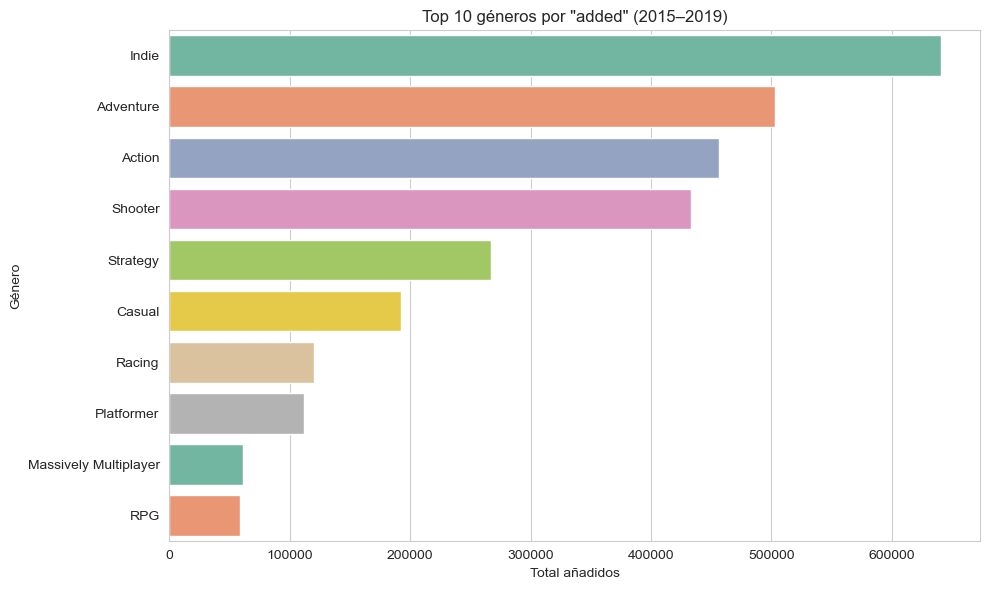

added,playtime
1.00,0.40
0.40,1.00


In [13]:
df_rango1 = top10_added_por_rango[top10_added_por_rango['rango'] == '2015-2019']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_rango1, x='popularidad', y='genero', hue='genero', palette='Set2')
plt.title('Top 10 géneros por "added" (2015–2019)')
plt.xlabel('Total añadidos')
plt.ylabel('Género')
plt.tight_layout()
plt.show()

correlacion = df_2015_2019[['added', 'playtime']].corr(method='pearson')
correlacion.style.hide(axis="index").format("{:.2f}")

### Gráfico de popularidad en base a "playtime"

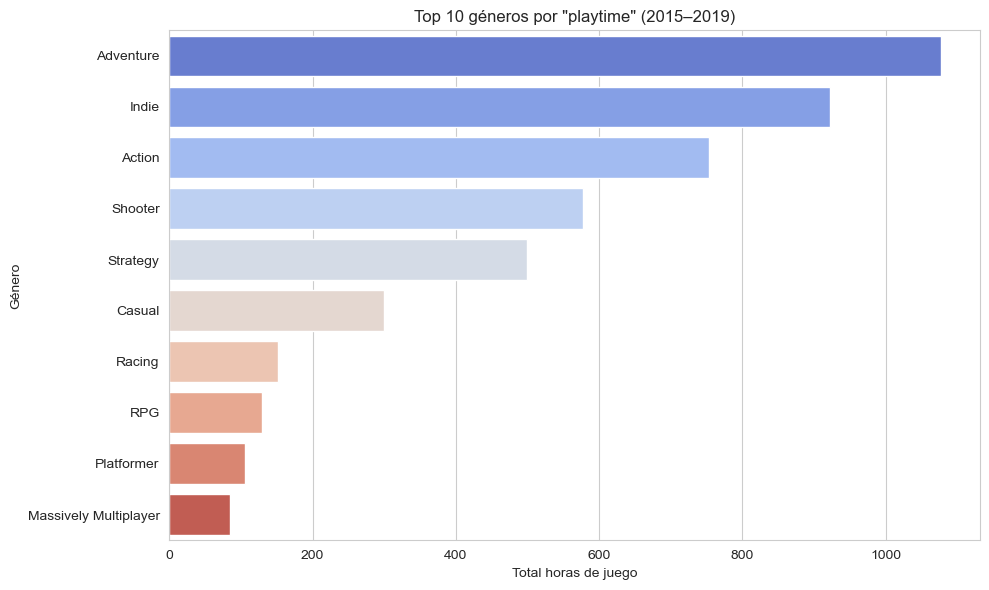

added,playtime
1.00,0.40
0.40,1.00


In [14]:
df_playtime1 = top10_playtime_por_rango[top10_playtime_por_rango['rango'] == '2015-2019']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_playtime1, x='tiempo_jugado', y='genero', hue='genero', palette='coolwarm')
plt.title('Top 10 géneros por "playtime" (2015–2019)')
plt.xlabel('Total horas de juego')
plt.ylabel('Género')
plt.tight_layout()
plt.show()

correlacion = df_2015_2019[['added', 'playtime']].corr(method='pearson')
correlacion.style.hide(axis="index").format("{:.2f}")

## Años 2019 a 2024

In [15]:
#Filtramos los datos del rango 2019 a 2024
df_2019_2024 = df[(df['año'] >= 2019) & (df['año'] <= 2024)]

### Gráfico de popularidad en base a "added"

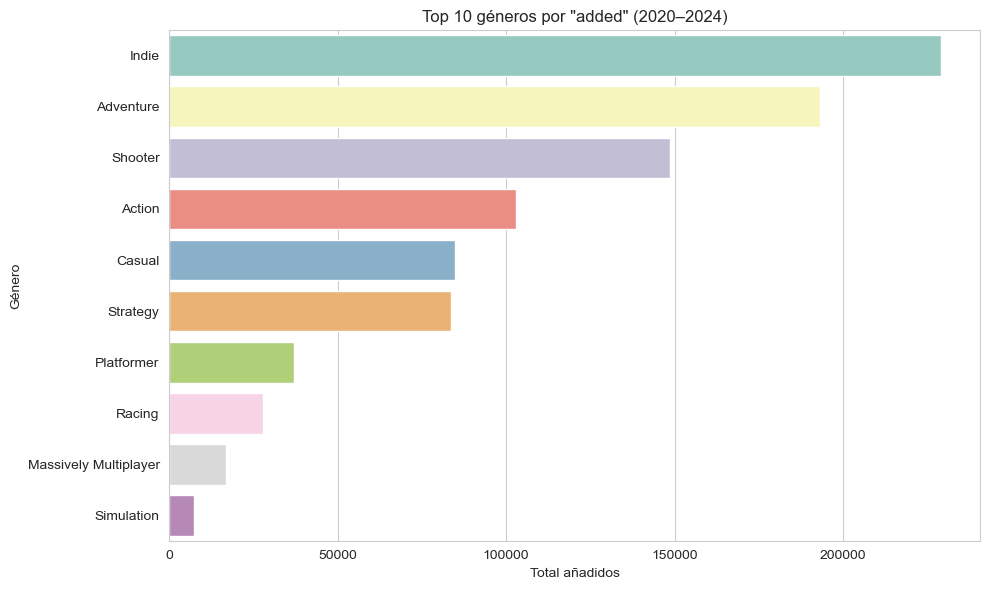

added,playtime
1.00,0.23
0.23,1.00


In [16]:
df_rango2 = top10_added_por_rango[top10_added_por_rango['rango'] == '2020-2024']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_rango2, x='popularidad', y='genero', hue='genero', palette='Set3')
plt.title('Top 10 géneros por "added" (2020–2024)')
plt.xlabel('Total añadidos')
plt.ylabel('Género')
plt.tight_layout()
plt.show()

correlacion = df_2019_2024[['added', 'playtime']].corr(method='pearson')
correlacion.style.hide(axis="index").format("{:.2f}")

### Gráfico de popularidad en base a "playtime"

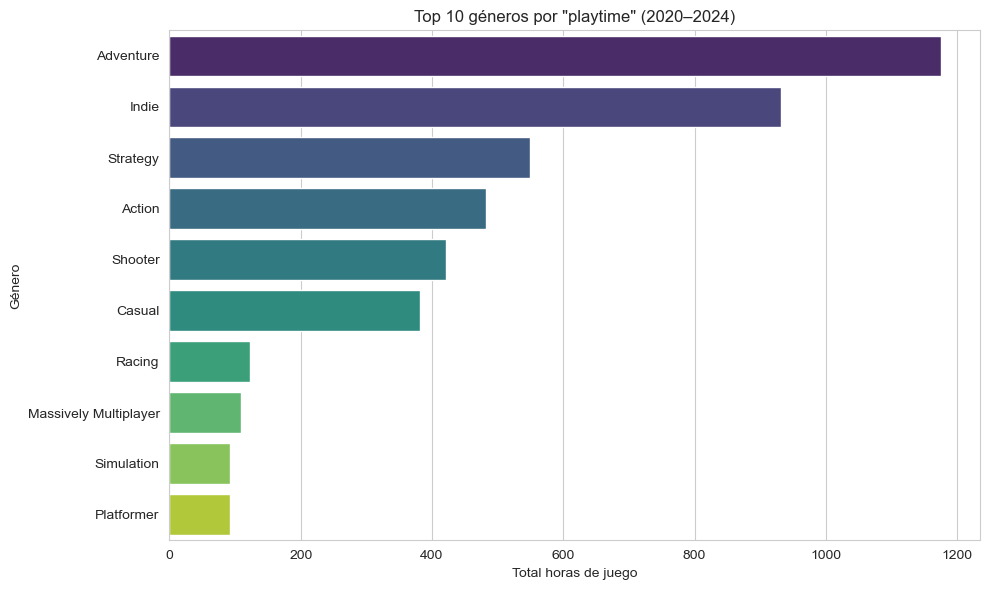

added,playtime
1.00,0.23
0.23,1.00


In [17]:
df_playtime2 = top10_playtime_por_rango[top10_playtime_por_rango['rango'] == '2020-2024']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_playtime2, x='tiempo_jugado', y='genero', hue='genero', palette='viridis')
plt.title('Top 10 géneros por "playtime" (2020–2024)')
plt.xlabel('Total horas de juego')
plt.ylabel('Género')
plt.tight_layout()
plt.show()

correlacion = df_2019_2024[['added', 'playtime']].corr(method='pearson')
correlacion.style.hide(axis="index").format("{:.2f}")

## Top 10 global (Años 2015 a 2024)

### Gráfica de popularidad por `added`

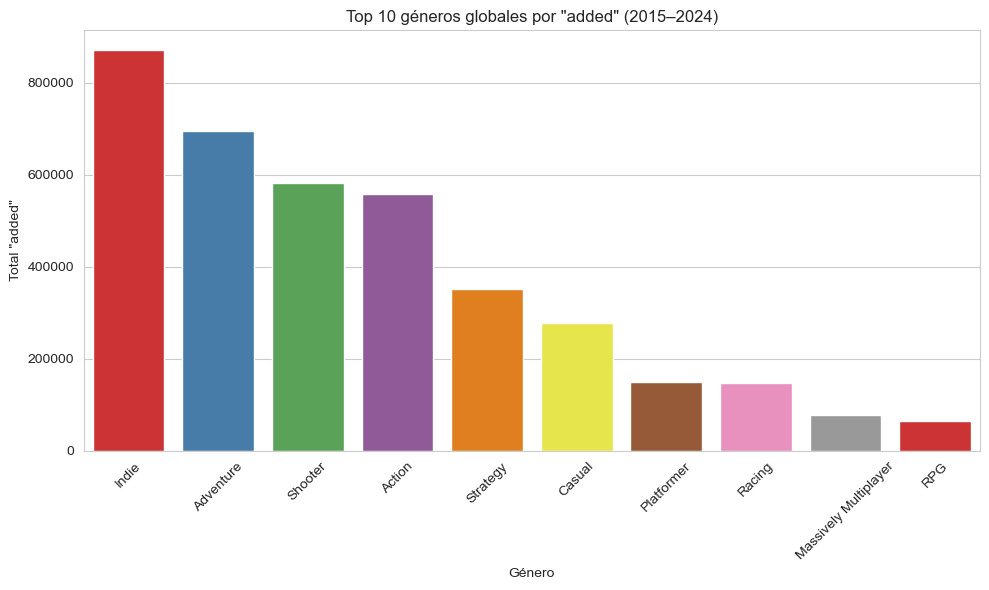

added,playtime
1.00,0.32
0.32,1.00


In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_added_global, x='genero', hue='genero', y='popularidad', palette='Set1')
plt.title('Top 10 géneros globales por "added" (2015–2024)')
plt.xlabel('Género')
plt.ylabel('Total "added"')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

correlacion = df[['added', 'playtime']].corr(method='pearson')
correlacion.style.hide(axis="index").format("{:.2f}")

### Gráfica de popularidad por "playtime"

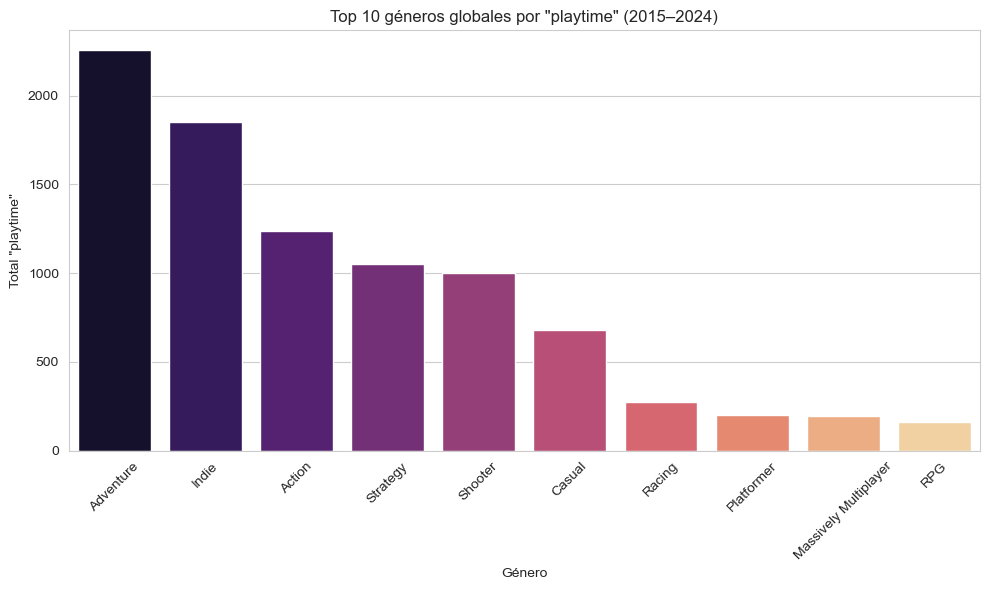

added,playtime
1.00,0.32
0.32,1.00


In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_playtime_global, x='genero', y='tiempo_jugado', hue='genero', palette='magma')
plt.title('Top 10 géneros globales por "playtime" (2015–2024)')
plt.xlabel('Género')
plt.ylabel('Total "playtime"')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

correlacion = df[['added', 'playtime']].corr(method='pearson')
correlacion.style.hide(axis="index").format("{:.2f}")

## Conclusión Final

Como hemos podido analizar en nuestros datos, la popularidad de los generos parece haberse mantenido de forma similar en los generos mas populares, siendo estos Acción, Aventura e Indie, que no han sufrido grandes cambios, habiendo valorado tanto la cantidad de veces que se han añadido sus juegos a las bibliotecas de los jugadores como la suma de las horas de juego totales. Si que hemos notado algunos cambios con otros generos.

Lo que hemos podido observar:

- Los géneros Acción, Aventura, Indie y RPG se mantienen en una posición dominante, tanto en veces añadidas como en horas jugadas. Como observación adicional, el género RPG reduce considerablemente su distancia con el género Indie, llegando casi a empatarlo en cuanto a horas jugadas (playtime)
  
- Empezando desde atrás, los 3 géneros menos populares se mantienen con una sorprendente excepción. El género Puzzle se mantiene en el top 10 y el Casual en el top 8 en ambos casos, pero, en la gráfica de horas jugadas (playtime), el género de juegos de Plataformas no solo pierde su lugar en el top 9, sino que desaparece de la gráfica y es sustituido por el genero Multijugador Masivo, que a su vez, hace aparición por primera vez en nuestra gráfica.

- Los géneros Shooter, Estrategia y Simulación, son los que mas variación sufren entre ellos, y por ello son los que parecen mas interesantes:

    - El género Shooter estaba en el top 5 en cuanto a juegos añadidos, en tiempo jugado, baja hasta el top 7.
    - El género Estrategia estaba en el top 6 en cuanto a juegos añadidos, en tiempo jugado, sube hasta el top 5.
    - El género Simulación estaba en el top 7 en cuanto a juegos añadidos, en tiempo jugado, sube hasta el top 6.

En resumen, observamos que no siempre es mas popular el juego que mas gente tiene añadida en su biblioteca o comprado, sino que también tiene bastante peso la cantidad de horas que acumulan sus usuarios. La clave esta en encontrar el balance entre ambas estadísticas, ya que ambas son muy importantes.

- Un juego que muchos usuarios adquieren, pero juegan poco tiempo, solo tendrá popularidad a corto plazo.
- Un juego cuyos usuarios juegan mucho tiempo, pero tiene pocos usuarios, solo tendrá popularidad a largo plazo, cuando más usuarios lo adquieran.

---

## ¿Qué relación existe entre la popularidad y la puntuación de un videojuego?

En esta sección se carga el archivo limpio `popularidad_vs_puntuacion.csv` y se realiza un análisis exploratorio básico para responder a la pregunta:

**¿Qué relación existe entre la popularidad y la puntuación de un videojuego?**

Se realiza:
- Un resumen estadístico de las columnas `added` y `rating`.
- La visualización de casos extremos (más populares y mejor puntuados).
- El cálculo del coeficiente de correlación de Pearson entre `added` y `rating`, para cuantificar la relación entre ambas variables.

También se revisa la columna `metacritic` para observar posibles diferencias entre la percepción del público y la crítica especializada.


In [21]:
# Cargamos los datos de popularidad y puntuación filtrados
df = pd.read_json("../data/processed/popularidad_vs_puntuacion.json")
df.head()


,name,rating,ratings_count,added,released,metacritic,has_rating,has_added,has_metacritic,rating_clean,added_clean
0,The Witcher 3: Wild Hunt,4.65,6896,21662,2015-05-18,92.0,True,True,True,4.65,21662
1,Life is Strange,4.12,3706,15758,2015-01-29,83.0,True,True,True,4.12,15758
2,Fallout 4,3.81,3352,14082,2015-11-09,84.0,True,True,True,3.81,14082
3,Rocket League,3.93,2822,12769,2015-07-07,86.0,True,True,True,3.93,12769
4,Rise of the Tomb Raider,4.04,2741,12212,2015-11-10,86.0,True,True,True,4.04,12212


## Estadísticas descriptivas

A continuación se muestra un resumen estadístico de las variables limpias `added_clean`, `rating_clean` y `metacritic`.


In [22]:
# Datos estadísticos de las columnas "added_clean", "rating_clean" y "metacritic"
df[["added_clean", "rating_clean", "metacritic"]].describe()

,added_clean,rating_clean,metacritic
count,2000.000000,2000.000000,1056.000000
mean,1953.703500,3.401180,76.918561
std,2181.671936,0.895355,8.416920
min,63.000000,0.000000,30.000000
25%,606.000000,3.090000,72.750000
50%,1313.500000,3.590000,78.000000
75%,2313.250000,3.980000,82.000000
max,21662.000000,4.790000,97.000000


In [23]:
# Filtramos los datos con valores válidos
df = df[(df["rating_clean"] != -1) & (df["added_clean"] != -1)]
df

,name,rating,ratings_count,added,released,metacritic,has_rating,has_added,has_metacritic,rating_clean,added_clean
0,The Witcher 3: Wild Hunt,4.65,6896,21662,2015-05-18,92.0,True,True,True,4.65,21662
1,Life is Strange,4.12,3706,15758,2015-01-29,83.0,True,True,True,4.12,15758
2,Fallout 4,3.81,3352,14082,2015-11-09,84.0,True,True,True,3.81,14082
3,Rocket League,3.93,2822,12769,2015-07-07,86.0,True,True,True,3.93,12769
4,Rise of the Tomb Raider,4.04,2741,12212,2015-11-10,86.0,True,True,True,4.04,12212
...,...,...,...,...,...,...,...,...,...,...,...
1995,Dark Hours: Prologue,0.00,0,67,2024-07-18,NaN,True,True,False,0.00,67
1996,Age of Water: The First Voyage,0.00,2,66,2024-03-21,NaN,True,True,False,0.00,66
1997,Legacy of Kain™ Soul Reaver 1&2 Remastered,0.00,5,66,2024-12-10,NaN,True,True,False,0.00,66
1998,SOUTH PARK: SNOW DAY!,2.36,10,65,2024-03-25,NaN,True,True,False,2.36,65


In [24]:
# Filtramos los datos con valores válidos
df = df[(df["rating_clean"] != -1) & (df["added_clean"] != -1)]
df

,name,rating,ratings_count,added,released,metacritic,has_rating,has_added,has_metacritic,rating_clean,added_clean
0,The Witcher 3: Wild Hunt,4.65,6896,21662,2015-05-18,92.0,True,True,True,4.65,21662
1,Life is Strange,4.12,3706,15758,2015-01-29,83.0,True,True,True,4.12,15758
2,Fallout 4,3.81,3352,14082,2015-11-09,84.0,True,True,True,3.81,14082
3,Rocket League,3.93,2822,12769,2015-07-07,86.0,True,True,True,3.93,12769
4,Rise of the Tomb Raider,4.04,2741,12212,2015-11-10,86.0,True,True,True,4.04,12212
...,...,...,...,...,...,...,...,...,...,...,...
1995,Dark Hours: Prologue,0.00,0,67,2024-07-18,NaN,True,True,False,0.00,67
1996,Age of Water: The First Voyage,0.00,2,66,2024-03-21,NaN,True,True,False,0.00,66
1997,Legacy of Kain™ Soul Reaver 1&2 Remastered,0.00,5,66,2024-12-10,NaN,True,True,False,0.00,66
1998,SOUTH PARK: SNOW DAY!,2.36,10,65,2024-03-25,NaN,True,True,False,2.36,65


## Casos extremos

Se muestran los videojuegos más populares y los mejor puntuados según las columnas tratadas.


In [25]:
# Top 10 más Populares
df.sort_values(by="added_clean", ascending=False).head(10)[["name", "added_clean", "rating_clean"]]

,name,added_clean,rating_clean
0,The Witcher 3: Wild Hunt,21662,4.65
600,Red Dead Redemption 2,16334,4.59
1,Life is Strange,15758,4.12
400,Destiny 2,14519,3.52
601,God of War (2018),14145,4.55
2,Fallout 4,14082,3.81
200,DOOM (2016),13861,4.38
1000,Cyberpunk 2077,13552,4.21
3,Rocket League,12769,3.93
401,Horizon Zero Dawn,12655,4.28


In [26]:
# Top 10 mejor puntuados
df.sort_values(by="rating_clean", ascending=False).head(10)[["name", "rating_clean", "added_clean"]]


,name,rating_clean,added_clean
377,The Witcher 3 Wild Hunt - Complete Edition,4.79,1406
1924,DRAGON BALL: Sparking! ZERO,4.75,109
1025,Persona 5 Royal,4.75,3076
1619,Cyberpunk 2077: Phantom Liberty,4.71,1032
1427,The Last of Us Part I,4.67,1660
0,The Witcher 3: Wild Hunt,4.65,21662
1223,Disco Elysium: Final Cut,4.65,2077
1604,Resident Evil 4,4.63,1982
1850,Elden Ring: Shadow of the Erdtree,4.62,284
1883,The Last of Us Part II Remastered,4.61,204


## Correlación entre Popularidad y Puntuación

Se calcula la correlación de Pearson entre las variables `added_clean` y `rating_clean`.


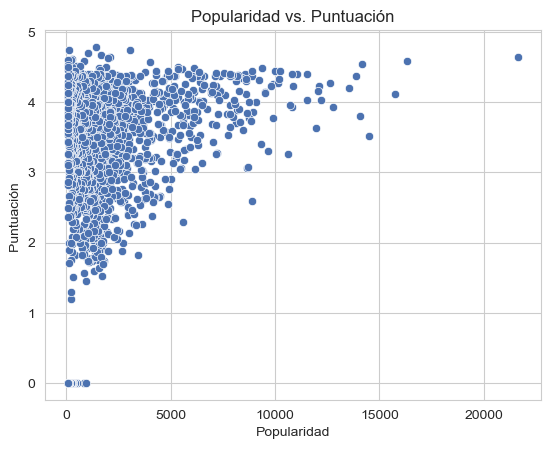

,added_clean,rating_clean
added_clean,1.000000,0.254801
rating_clean,0.254801,1.000000


In [27]:
# Visualización
sns.scatterplot(data=df, x="added_clean", y="rating_clean")
plt.title("Popularidad vs. Puntuación")
plt.xlabel("Popularidad")
plt.ylabel("Puntuación ")
plt.show()

# Correlación entre "added_clean" y "rating_clean"
df[["added_clean", "rating_clean"]].corr(method="pearson")

### Nota sobre la correlación

Aunque se observe cierta correlación entre la popularidad (`added_clean`) y la puntuación (`rating_clean`), **esto no implica causalidad**. La popularidad de un juego puede estar influida por muchos factores externos como campañas de marketing, franquicias conocidas o disponibilidad multiplataforma.

## Comparación con Metacritic

Se analiza la relación entre la puntuación de RAWG (`rating_clean`) y la puntuación de Metacritic.


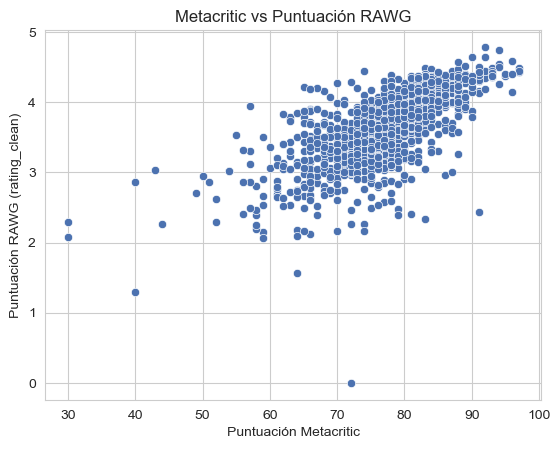

,rating_clean,metacritic
rating_clean,1.00000,0.68169
metacritic,0.68169,1.00000


In [28]:
# Visualización de la correlación entre rating_clean y metacritic
sns.scatterplot(data=df, x="metacritic", y="rating_clean")
plt.title("Metacritic vs Puntuación RAWG")
plt.xlabel("Puntuación Metacritic")
plt.ylabel("Puntuación RAWG (rating_clean)")
plt.show()

# Correlación adicional
df[["rating_clean", "metacritic"]].corr()

### Nota sobre la correlación

La gráfica muestra una relación positiva entre la puntuación otorgada por los usuarios de RAWG (`rating_clean`) y la puntuación de la crítica especializada (`metacritic`). Esto indica que, en general, los juegos mejor valorados por la crítica tienden también a recibir buenas puntuaciones por parte de los usuarios.

## Distribución de Puntuaciones

La distribución de puntuaciones `rating_clean` se concentra mayoritariamente entre 3 y 4 (teniendo en cuenta la distorción que han podido causar los NaN tratados), mostrando una tendencia a **evitar las valoraciones extremas**. Esta acumulación en el rango medio-alto puede reflejar una cierta **moderación en las valoraciones** por parte de los usuarios, o una predominancia de títulos de calidad aceptable en la base de datos.

Con la curva KDE vemos la forma de la distribución, que **se aproxima a una curva normal asimétrica hacia la izquierda**, con una cola que incluye juegos con valoraciones cercanas a 0.

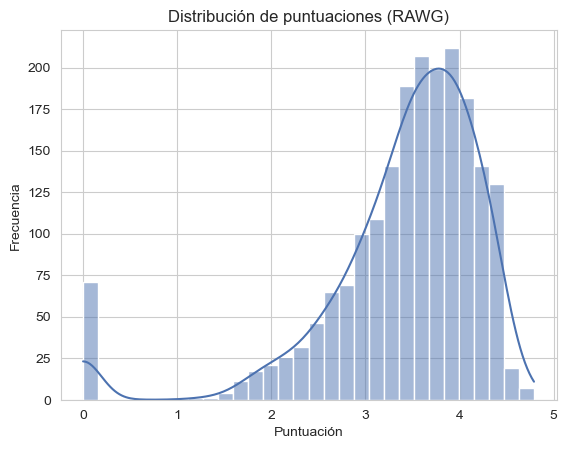

In [29]:

# Visualización de la distribución de puntuaciones
sns.histplot(df["rating_clean"], bins=30, kde=True)
plt.title("Distribución de puntuaciones (RAWG)")
plt.xlabel("Puntuación")
plt.ylabel("Frecuencia")
plt.show()


In [30]:
df[["rating_clean"]]

,rating_clean
0,4.65
1,4.12
2,3.81
3,3.93
4,4.04
...,...
1995,0.00
1996,0.00
1997,0.00
1998,2.36


## Distribución de Puntuaciones (Metacritic)

En esta gráfica vemos cómo se distribuyen las puntuaciones de los juegos según la crítica profesional (Metacritic). La mayoría de las valoraciones están entre **70 y 80 puntos**, formando una curva bastante simétrica, lo que sugiere que la crítica suele dar notas **medias-altas** y no se va mucho a los extremos.

Si comparamos esto con la gráfica de puntuaciones de usuarios (`rating_clean` de RAWG), se nota una diferencia importante. Las valoraciones de los usuarios se concentran más entre **3 y 4 puntos**, con una forma más irregular y una cola hacia la izquierda (hacia el 0), probablemente porque tambien se valoran como 0 en los datos de la API la falta de datos, porque hay juegos poco conocidos o mal valorados.

En resumen:
- **Los críticos** tienden a ser más "formales" y mantienen un rango estrecho de puntuaciones.
- **Los usuarios**, en cambio, son más variados en sus opiniones y no tienen problema en dar puntuaciones muy bajas si algo no les gusta.

Esta comparación viene genial para entender cómo varían las valoraciones según quién las dé, y cómo ambas perspectivas se complementan para tener una visión más completa de la calidad de los juegos.


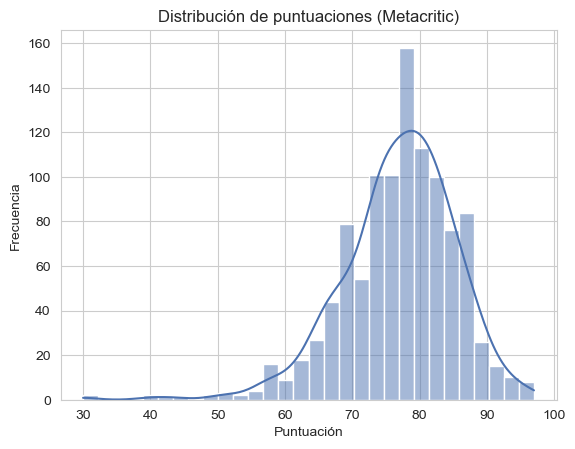

In [31]:

# Visualización de la distribución de puntuaciones Metacritic
sns.histplot(df["metacritic"], bins=30, kde=True)
plt.title("Distribución de puntuaciones (Metacritic)")
plt.xlabel("Puntuación")
plt.ylabel("Frecuencia")
plt.show()


In [32]:
df[["metacritic"]]

,metacritic
0,92.0
1,83.0
2,84.0
3,86.0
4,86.0
...,...
1995,NaN
1996,NaN
1997,NaN
1998,NaN


### Alta puntuación pero baja popularidad
Estos juegos tienen una puntuación excelente (`rating_clean` > 4.5) pero un número de añadidos (`added_clean`) muy bajo (menos de 100). Esto puede indicar **joyas ocultas** que han pasado desapercibidas para el gran público.


In [33]:

# Juegos con buena puntuación pero baja popularidad
df.sort_values(by="rating_clean", ascending=False).query("added_clean < 100")[["name", "rating_clean", "added_clean","metacritic"]].head(3)


,name,rating_clean,added_clean,metacritic
1968,Unicorn Overlord,4.53,83,NaN
1980,Felvidek,4.50,72,NaN
1958,Crow Country,4.46,88,NaN


### Alta popularidad pero baja puntuación
Estos juegos han sido muy añadidos por los usuarios (`added_clean` > 2500) pero tienen puntuaciones bastante bajas (`rating_clean` < 2). En estos casos, la popularidad puede estar influida por la curiosidad, la polémica o el marketing, pero **la calidad percibida no cumple las expectativas**.

In [34]:

# Juegos con mucha popularidad pero baja puntuación
df.sort_values(by="added_clean", ascending=False).query("rating_clean < 2")[["name", "rating_clean", "added_clean","metacritic"]].head(3)


,name,rating_clean,added_clean,metacritic
640,Headsnatchers,1.83,3422,NaN
293,Pixel Puzzles Ultimate,1.99,2722,NaN
80,GameGuru,1.88,2676,NaN


## Conclusión Final: Popularidad vs Puntuación

Este análisis ha permitido profundizar en la relación entre la **popularidad** y la **puntuación** de los videojuegos, utilizando tanto valoraciones de usuarios (RAWG) como de crítica profesional (Metacritic).

- En general, se observa una **correlación positiva** entre la popularidad y la puntuación: los juegos más valorados tienden a tener mayor visibilidad y número de añadidos por parte de los usuarios. No obstante, esta relación no es estrictamente lineal, y existen excepciones notables —juegos muy populares con puntuaciones medias y viceversa— lo que indica que otros factores como el marketing, la comunidad o el tipo de juego también juegan un papel importante.

- Las puntuaciones de usuarios (`rating_clean`) presentan una distribución sesgada con una gran cantidad de ceros. Este comportamiento **no representa necesariamente valoraciones negativas**, sino que puede estar influido por el funcionamiento de la API de RAWG, que puede que de un valor de **0 a juegos sin rating disponible**. Este aspecto puede distorsionar los análisis si no se trata adecuadamente y debe considerarse como un posible **sesgo en los datos**.

- Por otro lado, las puntuaciones de la crítica (`metacritic`) están más concentradas en valores medios-altos, mostrando una distribución más normal y estable. Esto sugiere que la crítica profesional tiende a valorar los juegos dentro de un rango más limitado y consistente.

**Conclusión clave:** Aunque existe una relación general entre popularidad y puntuación, **la forma en que se mide la puntuación (usuarios vs crítica) y el tratamiento de los datos nulos o ausentes tienen impacto en la interpretación**.

---

## ¿Qué plataformas tienen mejores valoraciones promedio de juegos?

Este código usa seaborn y matplotlib para visualizar la evolución de la valoración de plataformas de videojuegos a lo largo del tiempo:
Estilo visual: Se define el estilo darkgrid para mejorar la apariencia del gráfico.
Figura: Se crea una figura de tamaño (12, 6), ajustando la dimensión del gráfico.
Gráfico de líneas: Se traza la evolución de df_grupo1, usando marcadores (o) y una paleta de colores variada (rainbow).
Etiquetas y título: Se personalizan los ejes y el título para mayor claridad.
Leyenda: Se ubica la leyenda a la derecha para visualizar mejor las distintas plataformas.
Mostrar el gráfico: Se usa plt.show() para generar la visualización.

In [41]:
# Cargamos los datos de juegos por plataforma
df_grouped = pd.read_json("../data/processed/juegos_plataforma.json")
df_valo = pd.read_json("../data/processed/valoracion_plataforma.json")


### Filtrado de valoración de las plataformas por año.

Creamos la tabla para visualizar la media de valoración de juegos por plataforma.

Este código agrupa los datos de df3 por año y calcula el promedio de uso de varias plataformas de videojuegos. Luego, divide los resultados en dos grupos:
- df_grupo1: Datos entre 2015 y 2019.
- df_grupo2: Datos entre 2020 y 2024.

In [42]:
df_grupo1 = df_valo.loc[(df_valo.index >= 2015) & (df_valo.index <= 2019)]

df_grupo2 = df_valo.loc[(df_valo.index >= 2020) & (df_valo.index <= 2024)]
print(df_grupo1,df_grupo2)

      PlayStation 4  Xbox One  Nintendo Switch        PC  Nintendo 3DS  \
2015       3.616148  3.614082         3.663448  3.399223        3.7800   
2016       3.652446  3.641260         3.718831  3.493927        3.3075   
2017       3.613429  3.566721         3.643846  3.414263        4.1850   
2018       3.600949  3.608485         3.694510  3.512143           NaN   
2019       3.574462  3.556231         3.672600  3.466053           NaN   

         Wii U  PlayStation 5  PlayStation 3   PS Vita  Xbox Series S/X  \
2015  3.763333       4.116667       3.669231  3.648182         4.293333   
2016  3.136000       4.054000       3.630909  3.480000         4.112500   
2017  4.490000       3.660000       4.250000  4.032000         3.535000   
2018       NaN       4.025556       3.820000  3.750000         3.987778   
2019       NaN       3.888750            NaN  3.770000         3.847143   

      Classic Macintosh     macOS   Android       iOS     Linux       Wii  \
2015                NaN  3.

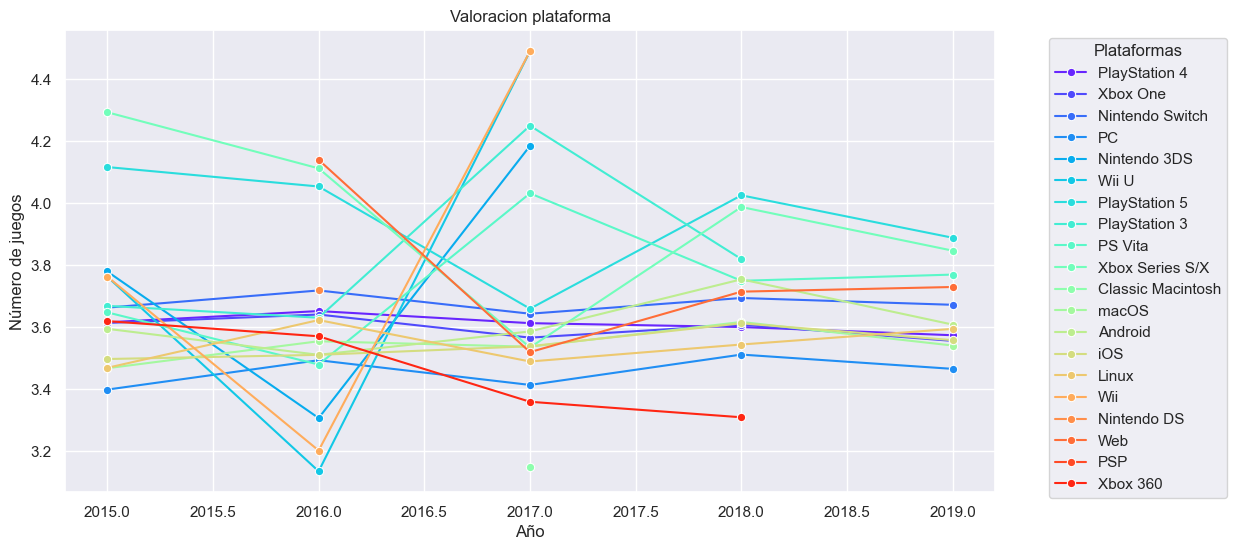

In [43]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_grupo1, dashes=False, marker="o", palette="rainbow")

plt.xlabel("Año")
plt.ylabel("Número de juegos")
plt.title("Valoracion plataforma")
plt.legend(title="Plataformas", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Para que sea más visual divimos el gráfico a la mitad.

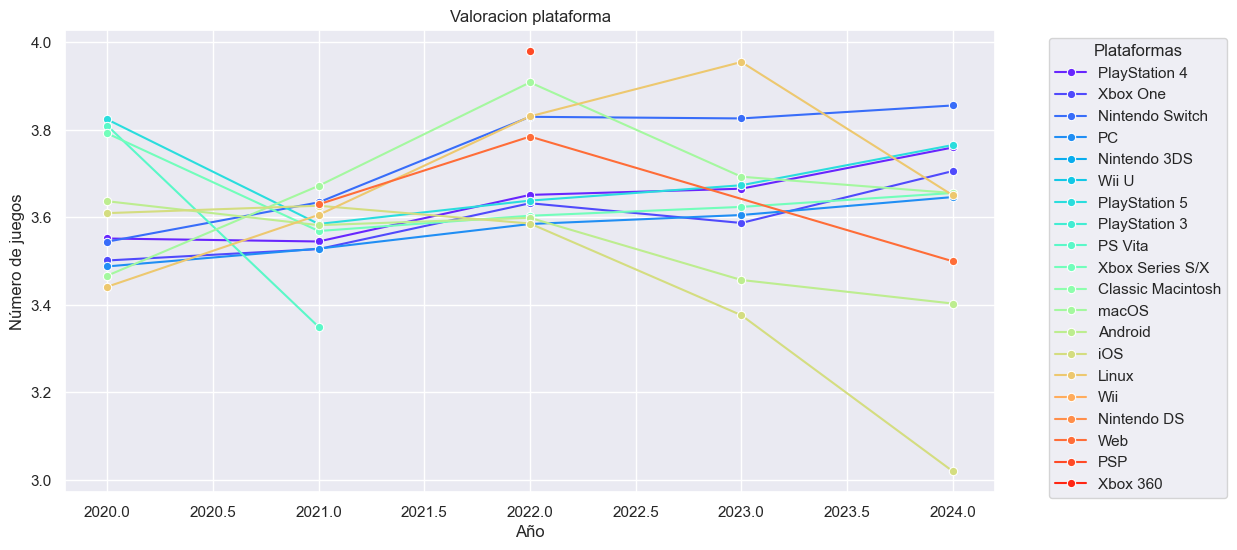

In [44]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_grupo2, dashes=False, marker="o", palette="rainbow")

plt.xlabel("Año")
plt.ylabel("Número de juegos")
plt.title("Valoracion plataforma")
plt.legend(title="Plataformas", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

Extraemos los datos y añadimos a un json para facilitar el uso de estos.

### Visualización de la cantidad de juegos lanzados por plataforma a lo largo de los años:

- Establece el estilo darkgrid para un fondo con líneas sutiles.
- Crea una figura de tamaño (12,6), optimizando la visualización.
- Grafica los datos de df_grouped con líneas, marcadores (o) y una paleta de colores variada (rainbow).
- Personaliza los ejes y título para mejorar la claridad del gráfico.
- Agrega una leyenda con las plataformas a la derecha del gráfico.
- Muestra el gráfico

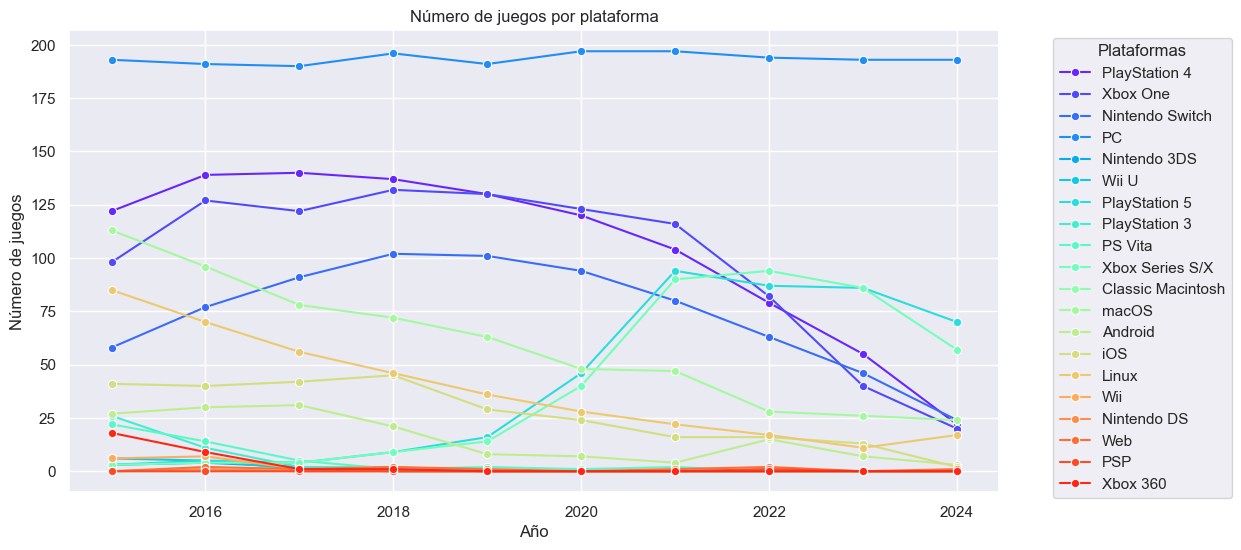

In [45]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_grouped, dashes=False, marker="o", palette="rainbow")

plt.xlabel("Año")
plt.ylabel("Número de juegos")
plt.title("Número de juegos por plataforma")
plt.legend(title="Plataformas", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


### Conclusión Final

A partir del análisis de las gráficas presentadas, se pueden obtener varias conclusiones importantes sobre la evolución de las plataformas de videojuegos entre 2015 y 2024, tanto en términos de valoración media como en el número de juegos lanzados.

En primer lugar, en las gráficas de valoración media por plataforma (2015–2019 y 2020–2024), se observa que plataformas como PlayStation 5, Nintendo Switch y PC han mantenido una valoración alta y estable en los últimos años, consolidándose como opciones preferidas por los jugadores. Por otro lado, plataformas móviles como Android e iOS muestran una tendencia descendente en su valoración, lo que podría indicar una caída en la percepción de calidad o una saturación del mercado. Además, plataformas más antiguas como PSP, Wii, y Xbox 360 muestran una clara caída o desaparición, reflejando el fin de su ciclo de vida.

En cuanto al número de juegos por plataforma, la gráfica muestra que PC se mantiene como la plataforma con mayor volumen constante de lanzamientos, superando los 180 juegos anuales en varios periodos. Nintendo Switch ha crecido de forma notable desde su lanzamiento y se mantiene fuerte hasta 2024. También se evidencia claramente el cambio generacional en consolas: a medida que PlayStation 4 y Xbox One van disminuyendo en lanzamientos después de 2020, plataformas más nuevas como PlayStation 5 y Xbox Series S/X aumentan su presencia, aunque con un crecimiento más moderado hacia 2024.

En resumen:

- PC lidera en cantidad de juegos y mantiene buena valoración.

- Nintendo Switch y PlayStation 5 se destacan tanto en volumen como en calidad.

- Android/iOS bajan en valoración con el tiempo.

- Las consolas de generaciones anteriores como PS4, Xbox One y Wii U están en claro descenso.

- Hay una transición clara entre generaciones, reflejada tanto en la valoración como en el número de juegos.

Este análisis permite entender cómo evolucionan las preferencias de los desarrolladores y usuarios con el paso del tiempo y cómo se posicionan las plataformas en el mercado actual.



---

## ¿Cómo ha evolucionado la puntuación media de los videojuegos con los años?  

Este notebook combina el análisis de dos dimensiones clave en la industria de los videojuegos:

1. La **evolución del número medio de géneros por juego** a lo largo de los años.
2. La **puntuación media por género principal y año** visualizada mediante un heatmap.

### Cargar datos
Se carga un archivo JSON ya tratado desde servidor local. 

In [107]:
df = pd.read_json('../data/processed/juegos_rawg_generos1.json')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nombre             2000 non-null   object 
 1   fecha_lanzamiento  2000 non-null   int64  
 2   puntuacion_media   2000 non-null   float64
 3   generos            2000 non-null   object 
 4   año                2000 non-null   int64  
 5   n_generos          2000 non-null   int64  
 6   rating             2000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 125.0+ KB


In [109]:
df

,nombre,fecha_lanzamiento,puntuacion_media,generos,año,n_generos,rating
0,The Witcher 3: Wild Hunt,1431907200000,4.65,"action, role-playing-games-rpg",2015,2,4.65
1,Life is Strange,1422489600000,4.12,adventure,2015,1,4.12
2,Fallout 4,1447027200000,3.81,"action, role-playing-games-rpg",2015,2,3.81
3,Rocket League,1436227200000,3.93,"racing, indie, sports",2015,3,3.93
4,Rise of the Tomb Raider,1447113600000,4.04,action,2015,1,4.04
...,...,...,...,...,...,...,...
1995,Dark Hours: Prologue,1721260800000,0.00,"adventure, action",2024,2,0.00
1996,Age of Water: The First Voyage,1710979200000,0.00,"massively-multiplayer, adventure, action",2024,3,0.00
1997,Legacy of Kain™ Soul Reaver 1&2 Remastered,1733788800000,0.00,"platformer, adventure, action, puzzle",2024,4,0.00
1998,SOUTH PARK: SNOW DAY!,1711324800000,2.36,"adventure, action",2024,2,2.36


### 6. Cálculo del número medio de géneros
Se agrupa por año y se calcula el número medio de géneros por juego. El valor se redondea a dos decimales. 

In [110]:
generos_por_año = df.groupby('año')['n_generos'].mean().round(3).reset_index()

### 7. Visualización 1 – Gráfico de burbujas
Se muestra un gráfico interactivo donde cada burbuja representa el año y el número medio de géneros por juego. El valor aparece sobre cada burbuja.

In [111]:
# Filtrar juegos con hasta 4 géneros
df = df[df['n_generos'] <= 4]

# Agrupar y calcular media
generos_por_año = df.groupby('año')['n_generos'].mean().round(3).reset_index()

# Visualización con burbujas
fig1 = px.scatter(
    generos_por_año,
    x='año',
    y='n_generos',
    size='n_generos',
    color='n_generos',
    title='Evolución del número medio de géneros por juego (máx 4)',
    labels={'n_generos': 'Media de géneros', 'año': 'Año'},
    hover_name='año',
    size_max=25,
    color_continuous_scale='inferno',
    text='n_generos'
)
fig1.update_traces(texttemplate='%{text:.3f}', textposition='top center')
fig1.show()


###  8. Extraer género principal
Se toma el primer género del listado como referencia para análisis por categoría principal.

In [ ]:
# Copia del DataFrame para evitar SettingWithCopyWarning
df = df.copy()
# Extraemos el género principal de la lista de géneros
import ast  # Para convertir string de lista a lista real si es necesario

df['genero_principal'] = df['generos'].apply(lambda x: ast.literal_eval(x)[0]['name'] if x and isinstance(x, str) else (x[0]['name'] if isinstance(x, list) and x else None))
# df['genero_principal'] = df['generos'].apply(lambda x: x[0]['name'] if x else None)


In [114]:
# copia del DataFrame para evitar SettingWithCopyWarning
df = df.copy()

# Extraer el primer género de la lista de géneros separados por comas como genero principal
df['genero_principal'] = df['generos'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) and x else None)

# Revisar los primeros resultados para confirmar
print(df[['generos', 'genero_principal']].head())


                          generos genero_principal
0  action, role-playing-games-rpg           action
1                       adventure        adventure
2  action, role-playing-games-rpg           action
3           racing, indie, sports           racing
4                          action           action


###  9. Crear tabla pivot para el heatmap
Se calcula la media de puntuación por género principal y año. Luego se transforma en una tabla para visualización, eliminando filas totalmente vacías.

In [115]:
pivot_df = df.groupby(['genero_principal', 'año'])['rating'].mean().reset_index()
heatmap_data = pivot_df.pivot(index='genero_principal', columns='año', values='rating')
heatmap_data = heatmap_data.dropna(how='all')

###  10. Visualización 2 – Heatmap
Se genera un mapa de calor con puntuaciones medias por género y año. Las celdas vacías no se rellenan con ceros, lo que mejora la claridad de la visualización.

In [116]:
fig2 = px.imshow(
    heatmap_data,
    text_auto='.1f',
    color_continuous_scale='inferno',
    labels={'color': 'Puntuación media'},
    title=' Puntuación media por género principal y año'
)
fig2.show()

## Conclusiones

- El número medio de géneros por juego ha mostrado una evolución que puede reflejar una **tendencia hacia la hibridación**, con títulos cada vez más variados.
- El heatmap revela qué **géneros han mantenido una alta calidad crítica** y cuáles han sufrido una caída en valoración.
- Este tipo de análisis permite observar tanto **tendencias creativas** como **preferencias del mercado** a lo largo del tiempo.
- Las visualizaciones interactivas ofrecen una forma poderosa y clara de comunicar hallazgos a partir de grandes volúmenes de datos del mundo del videojuego.

Este notebook es una base sólida para explorar nuevas dimensiones, como la relación entre plataformas, popularidad (`added`) y valoración.

---

# Conclusiones Finales

Tras el análisis exhaustivo de los datos de videojuegos obtenidos mediante la API de RAWG, hemos identificado algunos patrones y tendencias que nos permiten responder a la pregunta principal del proyecto:

**¿Qué características hacen triunfar a un juego?**

- **Diversificación de Géneros:** A lo largo de los años, hemos visto un aumento en el número medio de géneros por juego. Esta tendencia hacia la hibridación de géneros parece ser una característica clave en el éxito de muchos títulos, ya que permite atraer a un público más amplio y ofrecer experiencias más completas.

- **Géneros con Alta Valoración Crítica:** Algunos géneros se han consolidado como apuestas seguras en términos de calidad crítica. El análisis de los datos mediante heatmaps revela que géneros como la acción, la aventura y los RPG suelen mantener puntuaciones medias más altas, indicando que estos estilos de juego continúan cautivando tanto a los críticos como a los jugadores.

- **Adaptación a las Preferencias del Mercado:** El estudio de la evolución de la puntuación media y de la popularidad sugiere que los desarrolladores que son capaces de adaptarse a las tendencias creativas y las preferencias del público tienen mayores posibilidades de éxito.

- **Importancia de la Visualización y la Comunicación:** Las visualizaciones generadas (gráficos de burbujas y heatmaps) no solo permiten identificar tendencias, sino que también destacan la importancia de una comunicación clara y atractiva de los hallazgos. En un mercado tan competitivo como el de los videojuegos, la capacidad de transmitir el valor de un título es tan importante como su calidad intrínseca.

En conclusión, el éxito de un juego parece residir en la combinación de:

- La diversidad y la creatividad en el diseño (hibridación de géneros).  
- La calidad crítica constante en géneros consolidados.  
- La adaptación a las tendencias del mercado y la innovación constante.  
- Una comunicación visual clara y efectiva para conectar con la audiencia.

Estos factores son la base para desarrollar videojuegos que no solo alcancen el top 10 de cada año, sino que también dejen una huella duradera en la industria.
